In [4]:
#Define the BaseLocalPlanner object
class BaseLocalPlanner{ #Change to class
    public:
        bool computeVelocityCommands(cmd_vels::Vector{Float64}); #This will be the twist object
        void initialize(name::String, transfromPointer, costmap); # The second variable is a tf::TransfomListener*, costmap_2d::Costmap2DROS*
        bool isGoalReached();
        bool setPlan(path) #input is a constant vector of PoseStamped objects - gives times and positions
        ~BaseLocalPlanner();
    private:
        BaseLocalPlanner();        
}

LoadError: LoadError: syntax: missing comma or } in argument list
while loading In[4], in expression starting on line 5

In [ ]:
#Function polyPathLocal creates a nth order polynomial to be fit and optimized between the current copter configuration
# and a configuration on the global plan.
#Assumptions
# Default global path to plan to is Dijkstras
#Inputs
# Odometry.msg containing
#  current_Position - the current position of the robot, an object with x, y, and z points
#  current_Quaternion - the current orientation of the robot based on quaternions
#  current_Velocity - a vector of current velocities of the robot
#  current_YawRate - a value of yaw rate
# Path.msg either containing or providing
#  desired_Positions - an array of positions x,y,z, yaw = p
#  desired_Velocities - the end velocities for x,y,z,p
#  desired_Acceleration - the end accelerations for x,y,z,p
# flagFMT - a boolean that is true to indicate a computation assuming FMT global plan
# costMap - an array of cost values from 0-255
#Outputs
# Path.msg containing
#  path - an array of positions
#  timeStamps - an array of times corresponding to each position in the path
#  



In [ ]:
#Function computeVelocityCommands will compute the velocity commands to send to the base given current position, orientation
# and velocity
#Inputs
# 
#Outputs
# 
function computeVelocityCommands(cmd_vels::Vector{Float64})
    
    
end

In [ ]:
#Function initialize constructs the local planner
#Inputs
# name - the name to give this instance of the local planner
# tf - a pointer to a transform listener
# costmap_ros - the cost map to use for assignning costs to local plans
#Outputs
# Nothing
function initialize(name::String, tf, costmap)
    #Set name of the object to name
    #Set the tf
#Outputs
# 
function isGoalReached()
    
    #Read in costmap from global centered around robot
end

In [ ]:
#Function isGoalReached checks if the goals has been reached
#Inputs
# 
#Outputs
# 
function isGoalReached()
    
    
end

In [165]:
#Function setPlan sets the plan that the local planner is following
#Inputs
# 
#Outputs
# 
function setPlan(path)
    
    
end

setPlan (generic function with 1 method)

In [201]:
include("FunctionsHelper.jl")

get_grid_resolution (generic function with 1 method)

[10.2,1.0,0.0,8.57448,-1.62552,3.50069]
[10.3,1.0,0.0,45.1117,34.8117,-45.0823]
[3.50069]
in cost loop
[26.7766]
in cost loop
shortened step
[32.1774]
in cost loop
[27.5785]
in cost loop
[26.5911]
in cost loop
[26.0389]
in cost loop
shortened step
[26.9288]
in cost loop
[26.7618]
in cost loop
[25.765]
in cost loop
shortened step
[26.5255]
in cost loop
shortened step
[28.0985]
in cost loop
[25.946]
in cost loop
shortened step
[26.9232]
in cost loop
[25.7066]
in cost loop
shortened step
[26.2792]
in cost loop
[25.709]
in cost loop
shortened step
[26.0131]
in cost loop
[25.709]
in cost loop
shortened step
[26.2977]
in cost loop
[25.9518]
in cost loop
[25.7124]
in cost loop
shortened step
[25.952]
in cost loop
[25.7125]
in cost loop
[25.7052]
in cost loop
shortened step
[25.7133]
in cost loop
[25.701]
in cost loop
shortened step
[25.705]
in cost loop
[25.7008]
in cost loop
shortened step
[25.7028]
in cost loop
[25.7007]
in cost loop
[25.6996]
in cost loop
shortened step
[25.7006]
in cost l

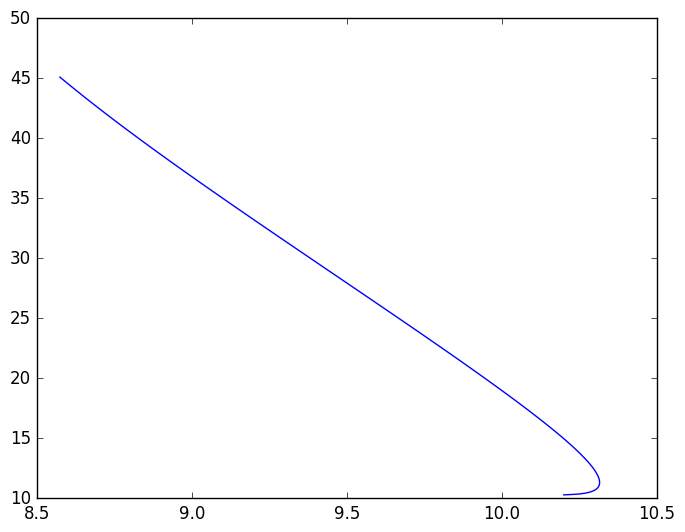

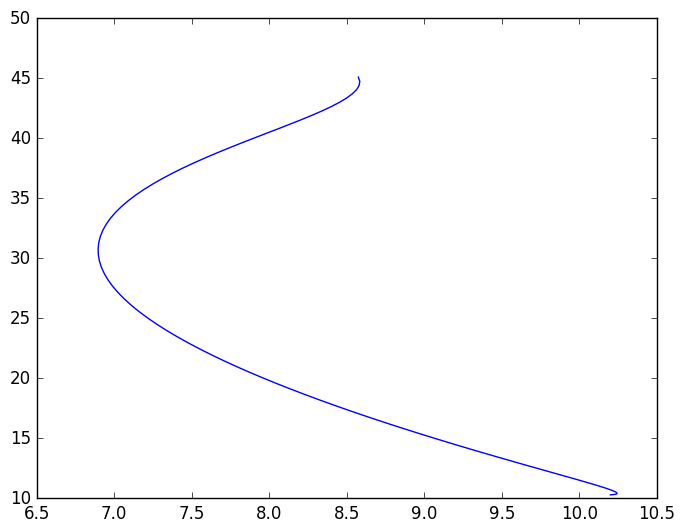

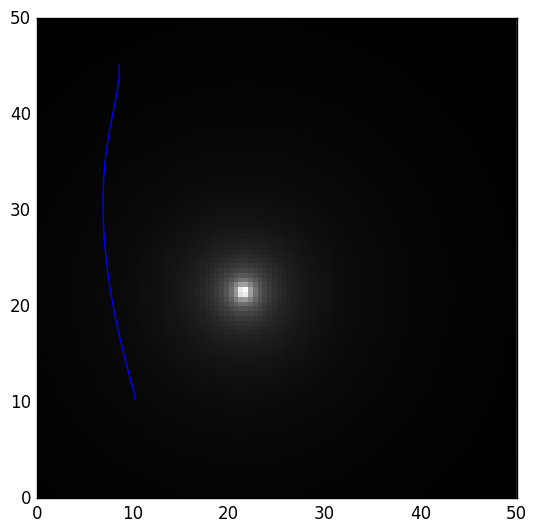

[7.91143,8.08254,8.0575,8.22088,8.38535,8.55027,8.47181,8.62157,8.76892,8.76976,8.89127,9.11403,8.90426,8.98499,9.05612,9.11688,8.85115,8.88536,8.90869,8.92087,8.92175,8.91135,8.88976,8.56202,8.52313,8.47506,8.4183,8.3534,8.28095,8.20159,8.116,8.02483,7.70837,7.61622,7.52057,7.42199,7.321,7.21811,7.00842,6.90245,6.79623,6.69007,6.58426,6.60763,6.49699,6.38765,6.27979,6.17355,6.06904,5.96636,5.86557,5.76675,5.75219,5.65325,5.55657,5.37001,5.34383,5.16437,5.07812,4.91234,4.87951,4.79969,4.6465]
start verify


PyObject <matplotlib.image.AxesImage object at 0x0000000035384240>

In [382]:

#Function polyPathLocal creates a 7th order polynomial to be fit and optimized between the current copter configuration
# and a configuration on the global plan.
#Assumptions
# Default global path to plan to is Dijkstras
# Average distance for local planner is 10 meters
# Three initial conditions are known
#Inputs
# current_Pos - the initial positions x,y,z, yaw = p
# current_Vel - the initial velocities in x,y,z, yaw = p
# current_Accel - the initial accelerations in x,y,z, yaw = p
# final_Pos - the final positions in x,y,z, yaw = p
# final_Vel - te final velocities in x,y,z, yaw = p
# final_Accel - the final accelerations in x,y,z, yaw = p
# costmap - an array of values from 0-255 to designate cost of traveling in a certain square by obstacles
# q_coeffs - a vector of weights to be applied to the derivative costs
# obstacleWeight - the weight applied to the obstacles in the cost function
# flag - a boolean that will decide between dijkstras or FMT global planning assumption, true -> fmt
# perturbStep - the amount of distance to start the gradient descent
# iterations - number of iterations to optimize over
#Outputs
# polyPath - the coefficients of the polynomial of the planned path
#####################Testing###########
#Create costmap
# Form a grid which shows the cells we check:
width = get_grid_extent();
res   = get_grid_resolution();
n = round(Int64,ceil(width/res));
costmap = zeros(n,n,n);
index = rand()*100;
for l = 1:size(costmap,1)
    for p = 1:size(costmap,2)
        costmap[l,p,1] = 255/(sqrt((l-index)^2+(p-index)^2)+1);
    end
end
current_Pos = Point(10.2,10.3,0,0);
current_Vel = Point(1,1,0,0);
current_Accel = Point(0,0,0,0);
final_Pos = Point(rand()*45+2,rand()*45+2,0,0);
final_Vel = Point(0,0,0,0);
final_Accel = Point(0,0,0,0);
flag = false;
q_coeff = zeros(6+flag);
#q_coeff[2] = 1;
q_coeff[4] = 1;
obstacleWeight = 0.05;
lowerQeffs = 100000;
iterations = 100;
perturbStep = 200;
precision = 0.000001;
dim = 2;
###########################################
#Changeable value
num_free = 1;
num_points = 2;

#Read in the states avaiable in the order initials, finals
if(flag)
    #All constraints
    x_constr = [current_Pos.x; current_Vel.x; current_Accel.x; final_Pos.x; final_Vel.x; final_Accel.x];
    y_constr = [current_Pos.y; current_Vel.y; current_Accel.y; final_Pos.y; final_Vel.y; final_Accel.y];
    z_constr = [current_Pos.z; current_Vel.z; current_Accel.z; final_Pos.z; final_Vel.z; final_Accel.z];
    p_constr = [current_Pos.p; current_Vel.p; current_Accel.p; final_Pos.p; final_Vel.p; final_Accel.p];
else
    #if dijkstras create a velocity approximation from the two points assuming traversed in a second - this gets relaxed
    #later in the verification step also note the lack of a final acceleration
    x_constr = [current_Pos.x; current_Vel.x; current_Accel.x; final_Pos.x; (final_Pos.x - current_Pos.x)];
    y_constr = [current_Pos.y; current_Vel.y; current_Accel.y; final_Pos.y; (final_Pos.y - current_Pos.y)];
    z_constr = [current_Pos.z; current_Vel.z; current_Accel.z; final_Pos.z; (final_Pos.z - current_Pos.z)];
    p_constr = [current_Pos.p; current_Vel.p; current_Accel.p; final_Pos.p; (final_Pos.p - current_Pos.p)];
end
#Set up the constraint matrix in the order initials, finals (plus another constraint for optimization)
num_constr = length(x_constr)+num_free;
#The two corresponds to acceleration being the 2nd derivative three 
#if dijkstras create a free variable of acceleration else create another constraint for jerk
orders = [collect(0:2); collect(0:(2+flag))];
#Create time vector assuming 1 second for the final conditions and zero for the initial conditions
#There are three zeros for three initial conditions
#The last value is flag to be a one when fmt is used otherwise it will be in the vector as a zero that is never used
times = collect(0.0:1.0);
timeIndex = [0;0;0;1;1;1;flag];
#Calculate some numbers
tot_degree = num_constr;
#Set up A matrix so that Ap = d where p is the coefficients of the polynomial and d are the constraints in a vector
A = zeros(tot_degree, tot_degree);
for k=1:tot_degree
    A[k,:] = constr_order(orders[k], times[timeIndex[k]+1],tot_degree);
end
#Calculate A inverse
A_inv = inv(A);
Au = A_inv;
# Form Q matrix where cost = p'Qp without the costmap
Q = form_Q(q_coeff, times[end]-times[1]); 
#Solve for the optimal ends with no costmap first
R = A_inv'*(Q*A_inv);
#short for optimizing matrix
opt_mat = -( R[(tot_degree-num_free+1):tot_degree, (tot_degree-num_free+1):tot_degree])\R[1:(tot_degree-num_free), 
    (tot_degree-num_free+1):tot_degree]';
#Record the optimized value in a variable for later gradient descent; will only work for 1 free variable at the moment
x_free = opt_mat * x_constr;
y_free = opt_mat * y_constr;
z_free = opt_mat * z_constr;
p_free = opt_mat * p_constr;
x_coeffs = A_inv * [x_constr; x_free];
y_coeffs = A_inv * [y_constr; y_free];
z_coeffs = A_inv * [z_constr; z_free];
p_coeffs = A_inv * [p_constr; p_free];
figure()
plotTimes = linspace(0,times[end],100);
plot(evaluate_poly(x_coeffs,0,plotTimes), evaluate_poly(y_coeffs,0,plotTimes));
println([x_constr; x_free])
println([y_constr; y_free])
println(opt_mat * x_constr)
#Check the cost with the costmap by first finding the squares the path goes through
#Find the cells of that the polynomial passes through; the last 5 inputs here are the three grid resolutions,
# the dimension and an aggression param
cells,holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffs, timeIndex, get_grid_resolution(), 
    get_grid_resolution(), get_grid_resolution(), dim, 0.8,0.01);
#The division by three is to normalize the costs from the coefficients#
#println(cells)
cost1 = (x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
    obstacleWeight*sum(costmap[cells]);
#Optimize for cost using gradient descent
unOptimized = true;
counter = 0;
#Start the while loop until optimized or over the number of times to iterate
while(unOptimized && counter <= iterations)
    println("in cost loop")
    #Perturb every dimension and solve for the new polynomials
    delta = perturbStep;
    #Check the cost of each perturbed poly, if increased, change the perturbation direction, record the rate of change
    x_coeffsP = A_inv * [x_constr; x_free+perturbStep];
    cells,holder = occupancyCellChecker(x_coeffsP, y_coeffs, z_coeffs, times, get_grid_resolution(),
        get_grid_resolution(), get_grid_resolution(), dim, 0.8,0.01);
    costx = (x_coeffsP' * Q * x_coeffsP + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
        obstacleWeight*sum(costmap[cells]);
    rateChangex = (costx-cost1)/perturbStep;
    y_coeffsP = A_inv * [y_constr; y_free+perturbStep];
    cells, holder = occupancyCellChecker(x_coeffs, y_coeffsP, z_coeffs, times, get_grid_resolution(), 
        get_grid_resolution(), get_grid_resolution(), dim, 0.8,0.01);
    costy = (x_coeffs' * Q * x_coeffs + y_coeffsP' * Q * y_coeffsP + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
        obstacleWeight*sum(costmap[cells]);
    rateChangey = (costy-cost1)/perturbStep;
    z_coeffsP = A_inv * [z_constr; z_free+perturbStep];
    cells, holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffsP, times, get_grid_resolution(), 
        get_grid_resolution(), get_grid_resolution(), dim, 0.8,0.01);
    costz = (x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffsP' * Q * z_coeffsP)/3/lowerQeffs +
        obstacleWeight*sum(costmap[cells]);
    rateChangez = (costz-cost1)/perturbStep;
    
    #Calculate the vector direction of maximum descent
    dir = normalize!([rateChangex[1]*(-sign(rateChangex)[1]); rateChangey[1]*(-sign(rateChangey)[1]); rateChangez[1]*(-sign(rateChangez)[1])]);
    
    #Step in that direction for all variables
    x_free += perturbStep * -sign(rateChangex)[1]*abs(dir[1]);
    y_free += perturbStep * -sign(rateChangey)[1]*abs(dir[2]);
    z_free += perturbStep * -sign(rateChangex)[1]*abs(dir[3]);
    
    #Calculate poly and cost and see if actually decreased
    x_coeffs = A_inv * [x_constr; x_free];
    y_coeffs = A_inv * [y_constr; y_free];
    z_coeffs = A_inv * [z_constr; z_free];
    cells,holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffs, times, get_grid_resolution(), 
        get_grid_resolution(), get_grid_resolution(), dim, 0.8,0.01);
    #The division by three is to normalize the costs from the coefficients
    costNew = (x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
        obstacleWeight*sum(costmap[cells]);
    #If not decreased half the step and recompute
    if((cost1-costNew)[1] < 0)
        println("shortened step")
        perturbStep = perturbStep/2;
        x_free -= perturbStep * -sign(rateChangex)[1]*abs(dir[1]);
        y_free -= perturbStep * -sign(rateChangey)[1]*abs(dir[2]);
        z_free -= perturbStep * -sign(rateChangex)[1]*abs(dir[3]);
    end
    #Check if within small change
    if(abs(perturbStep * dir[1]) < precision && abs(perturbStep * dir[2]) < precision && abs(perturbStep * dir[3]) < precision)
        unOptimized = false;
        println("Made it through optimization according to percision")
    end
    counter += 1;
    #println("counter: ", counter, "  iterations: ", iterations)
    #update cost
    cost1 = costNew;
    println(cost1)
end
#end while
if(counter>iterations)
    println("Optimization ended because went through all iterations")
end
println((x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs )
println(obstacleWeight*sum(costmap[cells]))

figure()
plotTimes = linspace(0,times[end],100);
plot(evaluate_poly(x_coeffs,0,plotTimes), evaluate_poly(y_coeffs,0,plotTimes));
for d in cells
    #costmap[d]=255;
end
#Check if collided by checking last cost bit
println(costmap[cells])
if(any(costmap[cells].>254))
    #return failure if collided still
    println("Leads to a collision so failure")
else
    #verfiy path is feasible based on constraints
    println("start verify")
    if(counter > iterations)
        println("Reached max iteration limit")
    end
    sol = PolySol(num_points-1, times, x_coeffs, y_coeffs, z_coeffs, p_coeffs); 
    errorTimes = verifyActuateablePath(sol, 2.0, 0.65, 10.0, 100000000000000.0);
    #Redo the calculation with a larger time if there are errors
    if(false)#!isempty(errorTimes))
        #Start a while loop to loop until the path is optimized
        errorExist = true;
        counter = 1;
        times[end] += 1;
        while(errorExist)
            #Create A matrix

            A = zeros(tot_degree, tot_degree)
            # Form Q matrix:
            Q = form_Q(q_coeff, times[end]-times[1]); 
            for k=1:tot_degree
                A[k,:] = constr_order(orders[k], times[timeIndex[k]+1],tot_degree);
                #println(Q[k,:])
            end
            #Set things equal
            A_inv = inv(A);

            # Compute free variables:
            R = A_inv'*(Q*A_inv);
            opt_mat = -( R[(tot_degree-num_free+1):tot_degree, (tot_degree-num_free+1):tot_degree])\R[1:(tot_degree-num_free), 
                (tot_degree-num_free+1):tot_degree]';
            #Record the optimized value in a variable for later gradient descent; will only work for 1 free variable at the moment
            x_free = opt_mat * x_constr;
            y_free = opt_mat * y_constr;
            z_free = opt_mat * z_constr;
            p_free = opt_mat * p_constr;
            x_coeffs = A_inv * [x_constr; x_free];
            y_coeffs = A_inv * [y_constr; y_free];
            z_coeffs = A_inv * [z_constr; z_free];
            p_coeffs = A_inv * [p_constr; p_free];
            #Put into a PolySol object
            sol = PolySol(num_points-1, times, x_coeffs, y_coeffs, z_coeffs, p_coeffs); 

            #Max Velocity and Acceleration taken from what is used in pikachu launch files
            #Max Jerk guessed
            errorTimes = verifyActuateablePath(sol, 2.0, 0.65, 10.0, 100000000000000.0);

            #Redo the calculation with a larger time if there are errors
            if(!isempty(errorTimes) && counter < 100)
                #Increment by 1 second every time
                counter += 1;
                times[end] += 1;
                #println(times);
            else
                errorExist = false;
                if(counter>100)
                    println("not verifiable in 100s")
                end
                println("past verify")
                #Find the cells of that the polynomial passes through
                cells,holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffs, times, get_grid_resolution(), 
                    get_grid_resolution(), get_grid_resolution(), dim, 0.5,0.01);
                println("past occupancy");
            end
        end
    end
end
#Create path
figure()
plotTimes = linspace(0,times[end],100);
plot(evaluate_poly(x_coeffs,0,plotTimes), evaluate_poly(y_coeffs,0,plotTimes));
#Flip costmap for ploting purposes
costmap = costmap[:,:,1]';
temp_costmap = zeros(size(costmap,1),size(costmap,2))
for h =1:size(costmap,1)
    temp_costmap[h,:,1] = costmap[size(costmap,1)-h+1,:,1];
end
imshow(temp_costmap,cmap="gray", interpolation="none",extent=[0,width,0,width])
#Return path

#


In [362]:
for q = -1000:1000
    xcoeffs = Au*[10.2;1;0;20;0;0;187];
    ycoeffs = Au*[12.3;1.0;0;22.3;0;0;230+q];
    plotTimes = linspace(0,1,100);
    plot(evaluate_poly(xcoeffs,0,plotTimes),evaluate_poly(ycoeffs,0,plotTimes) );
end
println(y_constr)
#[10.2,1.0,0.0,20.0,9.8,-11.7333]
#[10.3,1.0,0.0,22.3,12.0,-14.6667]

LoadError: LoadError: DimensionMismatch("second dimension of A, 6, does not match length of x, 7")
while loading In[362], in expression starting on line 1

In [85]:
println(x_coeffs)

[1.0,1.0,-2.03931e-16,-0.0107305,0.000172624,-6.6314e-7]
